In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
data = pd.read_csv('C:\\Users\\USER\\Desktop\\barewqa//Breast_cancer_data.csv')
print('Dataset :',data.shape)
x = data.iloc[:, [0, 1, 2, 3]].values
data.info()
data[:10]

Dataset : (569, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [3]:
from sklearn.model_selection import train_test_split
y=data['diagnosis']
x = data.drop(columns=['diagnosis'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

In [4]:
print('x train shape: ', x_train.shape)
print('y train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape)
print('y_test shape:',y_test.shape)

x train shape:  (455, 5)
y train shape:  (455,)
x_test shape:  (114, 5)
y_test shape: (114,)


In [5]:
np.mean(y_train)

0.621978021978022

In [6]:
np.mean(y_test)

0.6491228070175439

In [7]:
from sklearn.linear_model import LogisticRegression
example_lr=LogisticRegression()

In [8]:
example_lr.fit(x_train,y_train)

LogisticRegression()

In [9]:
y_pred=example_lr.predict(x_test)

In [10]:
is_correct=y_pred==y_test
np.mean(is_correct)

0.9035087719298246

In [11]:
example_lr.score(x_test,y_test)

0.9035087719298246

In [12]:
from sklearn import metrics

In [13]:
metrics.accuracy_score(y_test,y_pred)

0.9035087719298246

# To get true and false positive and negative rate

In [14]:
P=sum(y_test)
P

74

In [15]:
TP=sum((y_test==1)&(y_pred==1))
TP

72

In [16]:
TPR=TP/P
TPR

0.972972972972973

In [17]:
FN=sum((y_test==1)&(y_pred==0))
FN

2

In [18]:
FNR=FN/P
FNR

0.02702702702702703

In [19]:
metrics.confusion_matrix(y_test,y_pred)

array([[31,  9],
       [ 2, 72]], dtype=int64)

In [20]:
y_pred_proba=example_lr.predict_proba(x_test)
y_pred_proba[[6,8]]

array([[0.99616175, 0.00383825],
       [0.10623091, 0.89376909]])

In [21]:
proba_sum=np.sum(y_pred_proba,1)
proba_sum

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
proba_sum.shape

(114,)

In [23]:
np.unique(proba_sum)

array([1.])

In [24]:
pos_proba=y_pred_proba[:,1]
pos_proba[3]

0.9562075854269393

(array([26.,  1.,  3.,  0.,  3.,  2.,  2., 10., 10., 57.]),
 array([2.42427709e-06, 9.95263866e-02, 1.99050349e-01, 2.98574311e-01,
        3.98098274e-01, 4.97622236e-01, 5.97146198e-01, 6.96670161e-01,
        7.96194123e-01, 8.95718086e-01, 9.95242048e-01]),
 <BarContainer object of 10 artists>)

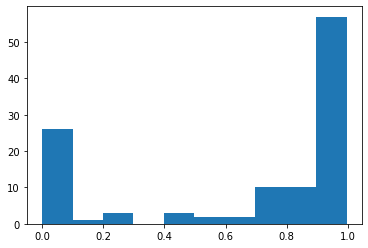

In [25]:
plt.hist(pos_proba)

In [28]:
pos_sample_pos_proba=pos_proba[y_test==1]
neg_sample_pos_proba=pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

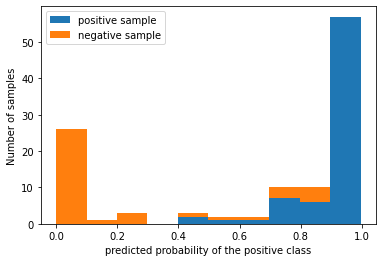

In [29]:
plt.hist([pos_sample_pos_proba,neg_sample_pos_proba],histtype='barstacked')
plt.legend(['positive sample','negative sample'])
plt.xlabel('predicted probability of the positive class')
plt.ylabel('Number of samples')

In [31]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pos_proba)

#receiver operating characteristic(ROC)

Text(0.5, 1.0, 'ROC CURVE')

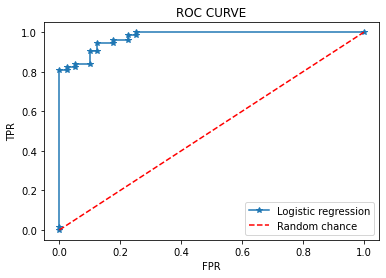

In [33]:
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic regression','Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')

In [34]:
thresholds

array([1.99524205e+00, 9.95242048e-01, 8.78422231e-01, 8.57195539e-01,
       8.53310455e-01, 8.34054603e-01, 8.27211414e-01, 8.05833491e-01,
       7.55978940e-01, 7.54756581e-01, 7.30612582e-01, 6.96972697e-01,
       6.51209949e-01, 5.41541087e-01, 4.67221039e-01, 4.65692589e-01,
       4.48698633e-01, 2.42427709e-06])

#calculate ROC AUC

In [35]:
metrics.roc_auc_score(y_test,pos_proba)

0.9753378378378379